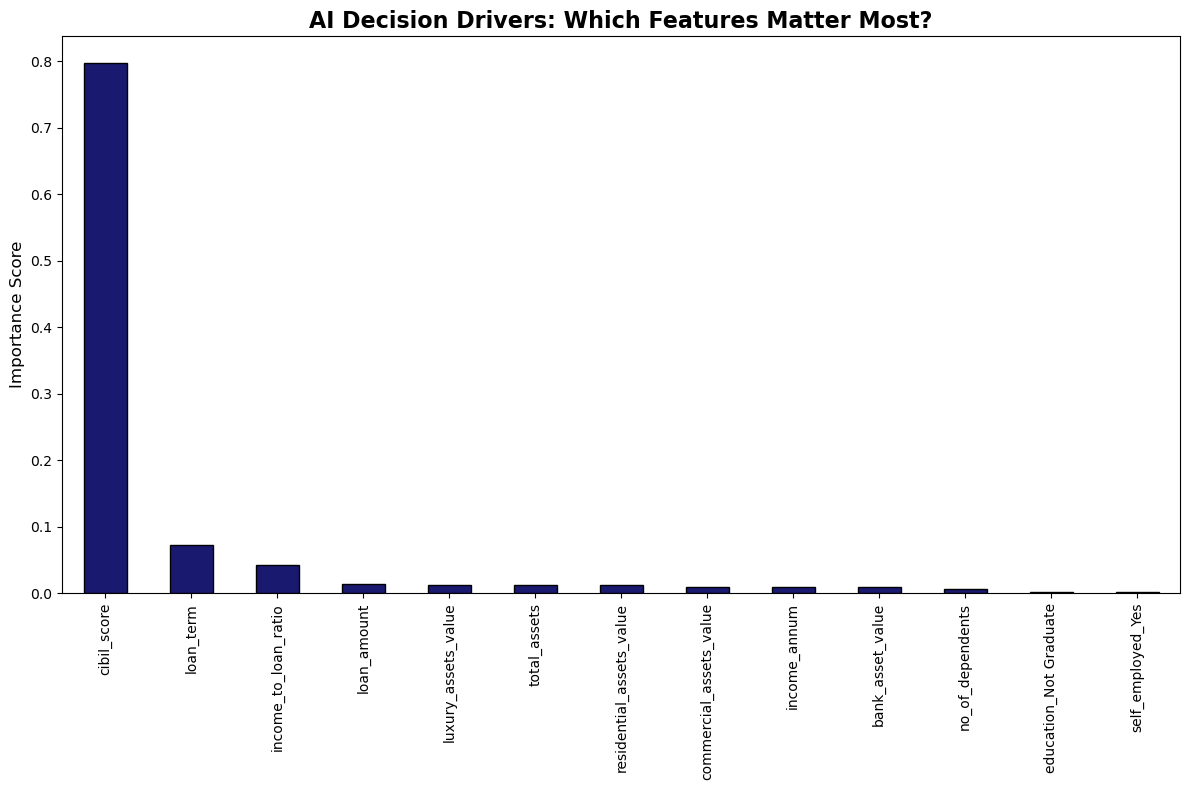


🏆 THE TOP 3 PREDICTORS ARE:
------------------------------
1. cibil_score (0.80)
2. loan_term (0.07)
3. income_to_loan_ratio (0.04)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. LOAD AND PREPARE DATA
df = pd.read_csv('loan_data_cleaned.csv')
df.columns = df.columns.str.strip()

# Encode Target
df['loan_status_encoded'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})

# Prepare Features (X) and Target (y)
X = df.drop(['loan_id', 'loan_status', 'loan_status_encoded'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True) 
y = df['loan_status_encoded']

# 2. TRAIN THE MODEL (Defining 'model')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. CALCULATE FEATURE IMPORTANCE
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 4. VISUALIZATION
plt.figure(figsize=(12, 8))
importances.plot(kind='bar', color='midnightblue', edgecolor='black')
plt.title('AI Decision Drivers: Which Features Matter Most?', fontsize=16, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

print("\n🏆 THE TOP 3 PREDICTORS ARE:")
print("-" * 30)
for i in range(3):
    print(f"{i+1}. {importances.index[i]} ({importances.iloc[i]:.2f})")